In [1]:
#简单移动平均

In [11]:
import talib 
import jqdatasdk
import numpy as np
from matplotlib import pyplot as plt
jqdatasdk.auth("18732929028","929028")
close = jqdatasdk.get_price('600519.XSHG',start_date='2020-01-01',end_date='2020-06-01')['close']

In [12]:
close


2020-01-02    1130.00
2020-01-03    1078.56
2020-01-06    1077.99
2020-01-07    1094.53
2020-01-08    1088.14
               ...   
2020-05-26    1358.00
2020-05-27    1338.00
2020-05-28    1344.00
2020-05-29    1366.60
2020-06-01    1419.50
Name: close, Length: 98, dtype: float64

In [13]:
ma10 = talib.SMA(close, timeperiod=10)
ma20 = talib.SMA(close, timeperiod=20)
ma30 = talib.SMA(close, timeperiod=30)

In [14]:
ma10

2020-01-02         NaN
2020-01-03         NaN
2020-01-06         NaN
2020-01-07         NaN
2020-01-08         NaN
                ...   
2020-05-26    1343.406
2020-05-27    1343.611
2020-05-28    1345.352
2020-05-29    1350.712
2020-06-01    1358.041
Length: 98, dtype: float64

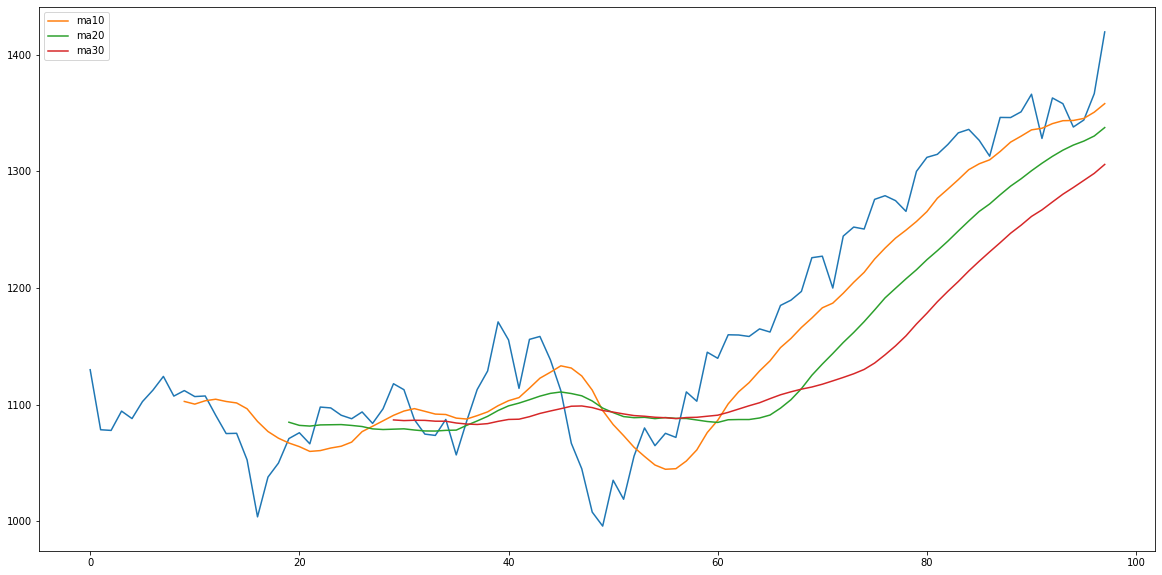

In [15]:
fig=plt.figure(figsize=(20,10))
plt.plot(np.arange(0,len(close)),close)
plt.plot(np.arange(0,len(close)),ma10,label='ma10')
plt.plot(np.arange(0,len(close)),ma20,label='ma20')
plt.plot(np.arange(0,len(close)),ma30,label='ma30')
plt.legend()
plt.show()

In [ ]:
#MACD

In [16]:
DIF, DEA, macdhist = talib.MACD(close, fastperiod=12, slowperiod=26, signalperiod=9)

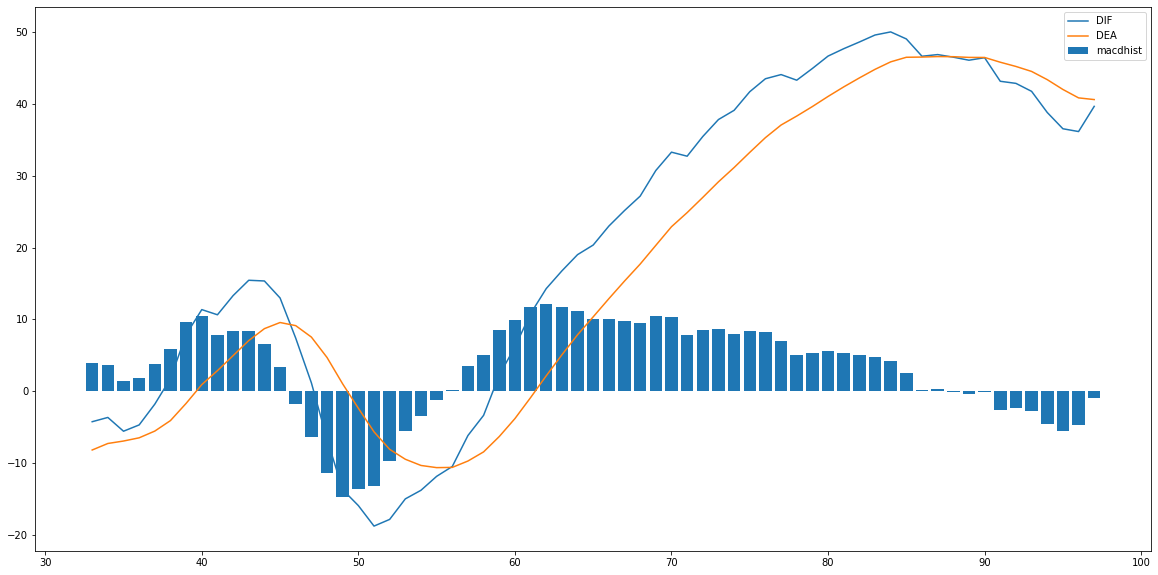

In [17]:
fig=plt.figure(figsize=(20,10))
#plt.plot(np.arange(0,len(close)),close)
plt.plot(np.arange(0,len(close)),DIF,label='DIF')
plt.plot(np.arange(0,len(close)),DEA,label='DEA')
plt.bar(np.arange(0,len(close)),macdhist,label='macdhist')
plt.legend()
plt.show()

In [18]:
#KDJ

In [19]:
#Talib上没有直接的KDJ指标，但是有KD指标

In [22]:
price = jqdatasdk.get_price('600519.XSHG',start_date='2020-01-01',end_date='2020-06-01')[['open','high','low','close']]

In [23]:
price.head()

,open,high,low,close
2020-01-02,1128.00,1145.06,1116.00,1130.00
2020-01-03,1117.00,1117.00,1076.90,1078.56
2020-01-06,1070.86,1092.90,1067.30,1077.99
2020-01-07,1077.50,1099.00,1076.40,1094.53
2020-01-08,1085.05,1095.50,1082.58,1088.14


In [ ]:
#KD的计算需要用到最高价、最低价、收盘价

In [ ]:
# 定义一个时间区间 
# RSV=（当前收盘价-区间内最低价）/ (区间内最高价- 区间内最低价)*100%
# 当日K值=2/3×前一日K值+1/3×当日RSV
# 当日D值=2/3×前一日D值+1/3×当日K值
# 当日J值=3*当日K值-2*当日D值

#flask_period: 计算RSV的周期
#slowk_period: K线是由RSV的几日移动平均线得到
#slowd_period: D线是由K线的几日移动平均得到
#我们可以自己计算J

In [24]:
slowk, slowd = talib.STOCH(price.high, price.low, price.close, fastk_period=9, slowk_period=3, slowd_period=3)

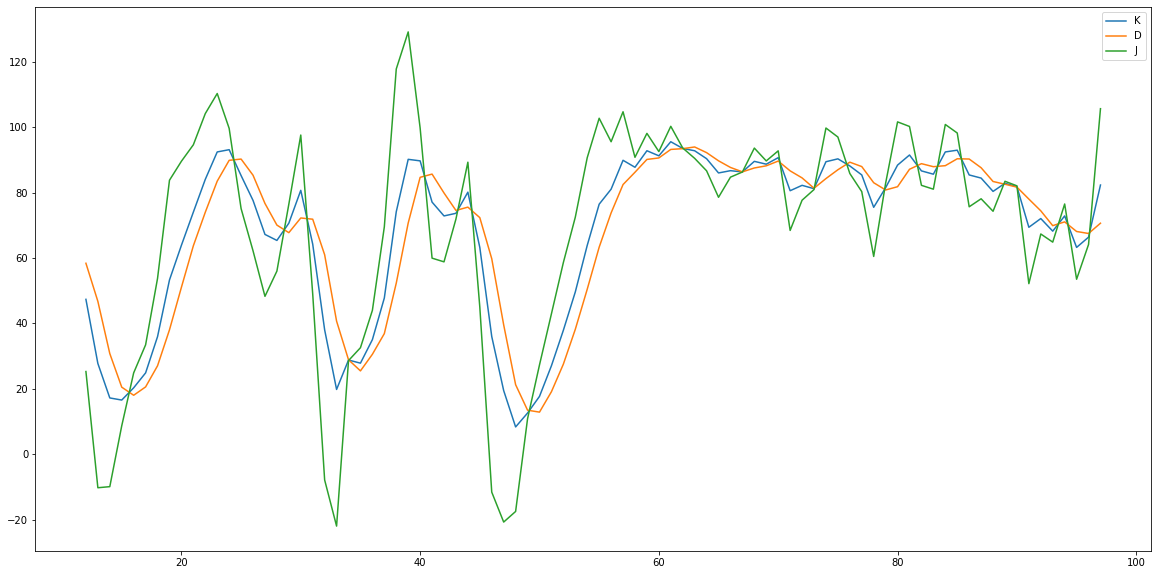

In [25]:
fig=plt.figure(figsize=(20,10))
#plt.plot(np.arange(0,len(close)),close)
plt.plot(np.arange(0,len(price)),slowk,label='K')
plt.plot(np.arange(0,len(price)),slowd,label='D')
plt.plot(np.arange(0,len(price)),3*slowk-2*slowd,label='J')
plt.legend()
plt.show()

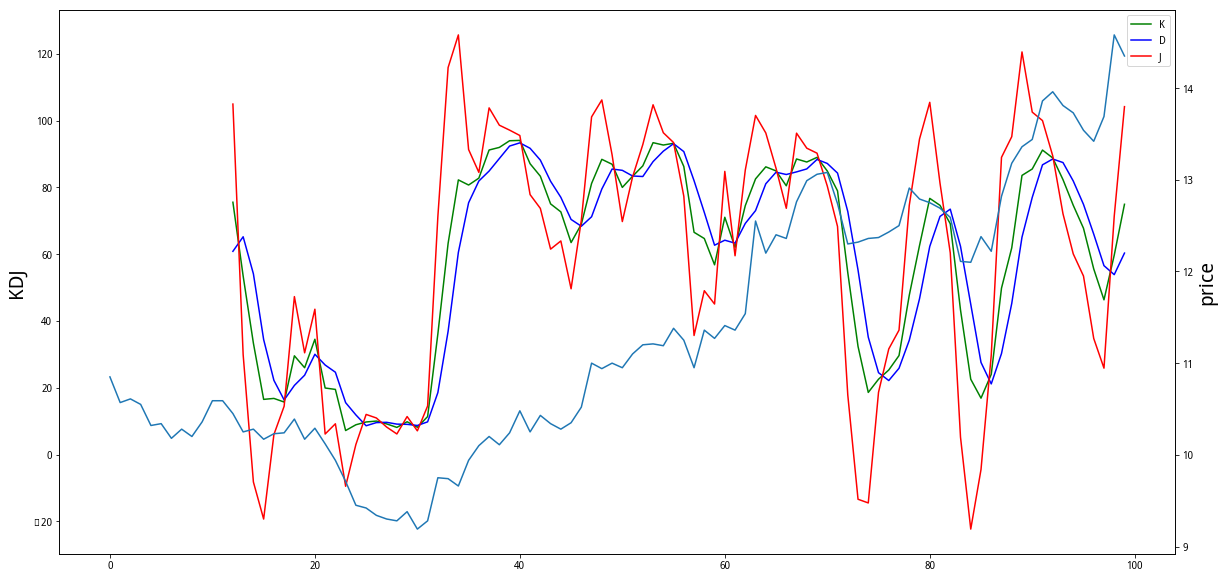

In [51]:
import numpy as np
import matplotlib.pyplot as plt
fig, ax1 = plt.subplots(figsize=(20,10))
ax2 = ax1.twinx()

ax1.plot(np.arange(0,len(price)),slowk,'g-',label='K')
ax1.plot(np.arange(0,len(price)),slowd,'b-',label='D')
ax1.plot(np.arange(0,len(price)),3*slowk-2*slowd,'r-',label='J')
ax1.legend()
ax2.plot(np.arange(0,len(price)),price.close,label='close')

ax1.set_ylabel('KDJ', size=20)
ax2.set_ylabel('price', size=20)

plt.show()

In [ ]:
#K线形态识别

In [ ]:
#两只乌鸦

In [26]:
integer = talib.CDL2CROWS(price.open, price.high, price.low, price.close)

In [27]:
integer.values

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
#十字星

In [33]:

integer1= talib.CDLDOJI(price.open, price.high,price.low, price.close)

In [34]:
integer1.values

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0, 100,   0,   0,   0,   0,   0,   0, 100,
         0,   0,   0,   0, 100,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0, 100, 100,   0,   0,   0,   0, 100,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0, 100, 100,   0,   0,   0,
         0,   0, 100,   0,   0,   0,   0,   0, 100,   0,   0,   0,   0,
         0,   0,   0, 100, 100,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0])